## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_mouse_study["Mouse ID"])
number_of_mice_unique = len(combined_mouse_study["Mouse ID"].unique())
mice_counts = combined_mouse_study["Mouse ID"].value_counts()
findings = combined_mouse_study.loc[combined_mouse_study["Mouse ID"]=="g989"]
number_of_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_mouse_study[combined_mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. Did in 
duplicate_mouse_data = combined_mouse_study.loc[combined_mouse_study["Mouse ID"]=="g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = combined_mouse_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mice_counts2 = clean_mouse_study["Mouse ID"].value_counts()
findings2 = clean_mouse_study.loc[clean_mouse_study["Mouse ID"]=="k403"]
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = len(clean_mouse_study["Mouse ID"])
clean_number_of_mice_unique = len(clean_mouse_study["Mouse ID"].unique())
clean_number_of_mice

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_groupby_means = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_groupby_medians = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_groupby_variance = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_groupby_standard_deviation = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_groupby_sem = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_statistics = summary_groupby_means,summary_groupby_medians,summary_groupby_variance,summary_groupby_standard_deviation,summary_groupby_sem
summary_statistics_df = pd.DataFrame(summary_statistics, index=["Mean", "Median", "Variance", "Standard Deviation", "SEM"]).T
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_df2 = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_statistics_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

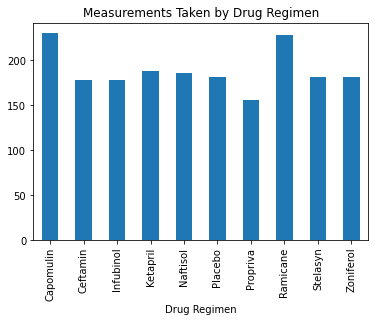

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_count = clean_mouse_study.groupby("Drug Regimen")["Mouse ID"].count()
ax1_bar = drug_regimen_count.plot.bar(x="Drug Regimen", y="Measurments taken", title="Measurements Taken by Drug Regimen")

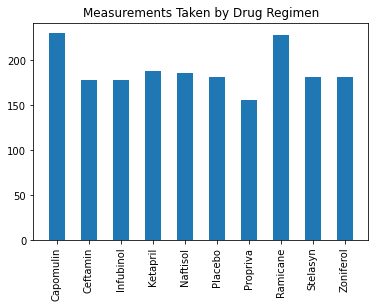

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_regimen_count))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, drug_regimen_count, align="center", width=.5)
plt.xticks(tick_locations,drug_regimen_count.keys(), rotation="vertical")
plt.title("Measurements Taken by Drug Regimen")
plt.show()

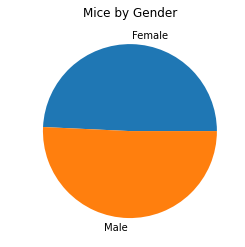

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_groupby_gender = clean_mouse_study.groupby("Sex")["Mouse ID"].count()
mice_groupby_gender = mice_groupby_gender.rename(" ")
ax2_pie = mice_groupby_gender.plot(kind="pie", title="Mice by Gender")

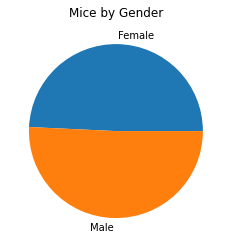

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = mice_groupby_gender.keys()
plt.pie(mice_groupby_gender, labels=gender_labels)
plt.title("Mice by Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Creating DF with the greatest timepoint for each mouse
greatest_timepoint = combined_mouse_study.drop_duplicates(subset=["Mouse ID"], keep="last")

# Creating list of treatments
four_treatment_regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Filtering DF only for list of treatments
greatest_timepoint_filtered = greatest_timepoint.loc[greatest_timepoint["Drug Regimen"].isin(four_treatment_regimens)]

greatest_timepoint_filtered

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
# Just renaming the variable since I used it before and adding a list [1,2,3,4] for xticks
treatment_list = four_treatment_regimens
treatment_ticks = np.arange(1,len(treatment_list)+1,1)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# It took quite some time to understand but managed to create a DF of Quartiles grouped by Drug Regimen. 
quartiles = greatest_timepoint_filtered.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile([.25,.5,.75])

# Getting the iqrs for the whole quartiles DF
iqrs = quartiles[:,.75]-quartiles[:,.25]

# Getting upper and lower bounds to determine outliers
upper_outliers = quartiles[:,.75]+(1.5*iqrs)
lower_outliers = quartiles[:,.25]-(1.5*iqrs)

# Looking for potential outliers
potential_outliers = []
for index, row in greatest_timepoint_filtered.iterrows():
    if row["Tumor Volume (mm3)"]<lower_outliers[row["Drug Regimen"]]:
        potential_outliers.append(row)
    if row["Tumor Volume (mm3)"]>upper_outliers[row["Drug Regimen"]]:
        potential_outliers.append(row)
print(f"The amount of Potential Outliers is: {len(potential_outliers)}")
print(f"The information for the outlier is: \n{potential_outliers}")


The amount of Potential Outliers is: 1
The information for the outlier is: 
[Mouse ID                   c326
Drug Regimen          Infubinol
Sex                      Female
Age_months                   18
Weight (g)                   25
Timepoint                     5
Tumor Volume (mm3)      36.3213
Metastatic Sites              0
Name: 669, dtype: object]


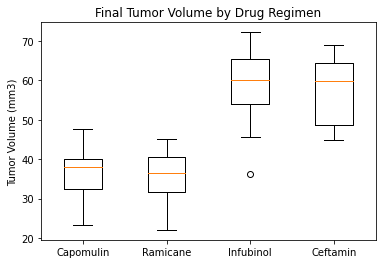

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
##I was trying to create a for loop to go thru treatments and for every treatment locate values and add to list but couldn't append or create a new list name. Still trying to figure it out...
##for name in range(len(treatment_list)):
##    for index, row in greatest_timepoint_filtered.iterrows():
##        if row["Drug Regimen"]==treatment_list[name]:
##            tumor_vol_data[treatment_list[name]].apppend(row["Tumor Volume (mm3)"])
##tumor_vol_data

# Creating data to plot, each list corresponds a drug regimen, then list all lists
data_infubinol = greatest_timepoint_filtered.loc[greatest_timepoint_filtered["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
data_capomulin = greatest_timepoint_filtered.loc[greatest_timepoint_filtered["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
data_ramicane = greatest_timepoint_filtered.loc[greatest_timepoint_filtered["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
data_ceftamin = greatest_timepoint_filtered.loc[greatest_timepoint_filtered["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
tumor_vol_data = data_capomulin,data_ramicane,data_infubinol,data_ceftamin

# Boxplots, adding some format to have outliers in different shape and color
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data)
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.xticks(treatment_ticks,treatment_list)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
